In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Dataframe creation
You can't do any analysis without data. In this task you will convert the available data to a dataframe taking only the required columns

In [2]:
df = pd.read_csv(r'C:\Users\SHRIK\Desktop\shrikant\Projects\GreyAtom Projects\Fifa Project\data\fifa.csv')
df = df[['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Preferred Positions', 'Wage']]
df.head()

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (22,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Positions,Wage
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,ST LW,€565K
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,RW,€565K
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,LW,€280K
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,ST,€510K
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,GK,€230K


# Data preprocessing
After loading the required data into structured format, next step is to cleanse the data for better analysis.

In [3]:
# Removes the symbol from values
df['Unit'] = df['Value'].str[-1]
df['Value (M)'] = np.where(df['Unit'] == '0', 0, df['Value'].str[1:-1].replace(r'[a-zA-Z]', ''))
df['Value (M)'] = df['Value (M)'].astype(float)
df['Value (M)'] = np.where(df['Unit'] == 'M', df['Value (M)'], df['Value (M)']/1000)

# Removes the symbol from Wage
df['Unit2'] = df['Wage'].str[-1]
df['Wage (M)'] = np.where(df['Unit2'] == '0', 0, df['Wage'].str[1:-1].replace(r'[a-zA-Z]', ''))
df['Wage (M)'] = df['Wage (M)'].astype(float)
df['Wage (M)'] = np.where(df['Unit2'] == 'M', df['Wage (M)'], df['Wage (M)']/1000)

# Drop the Unit and Unit2 from df
df = df.drop(['Unit', 'Unit2'], 1)

# New column position
df['Position'] = df['Preferred Positions'].str.split().str[0]
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Positions,Wage,Value (M),Wage (M),Position
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,ST LW,€565K,95.5,0.565,ST
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,RW,€565K,105.0,0.565,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,LW,€280K,123.0,0.280,LW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,ST,€510K,97.0,0.510,ST
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,GK,€230K,61.0,0.230,GK


# Visualization
A rich club has decided to hire you as their manager. You have all the money to build a team from scratch.

Now you have the data. Being a data scientist, you first want to check the general trend of market with respect to players and their worth.

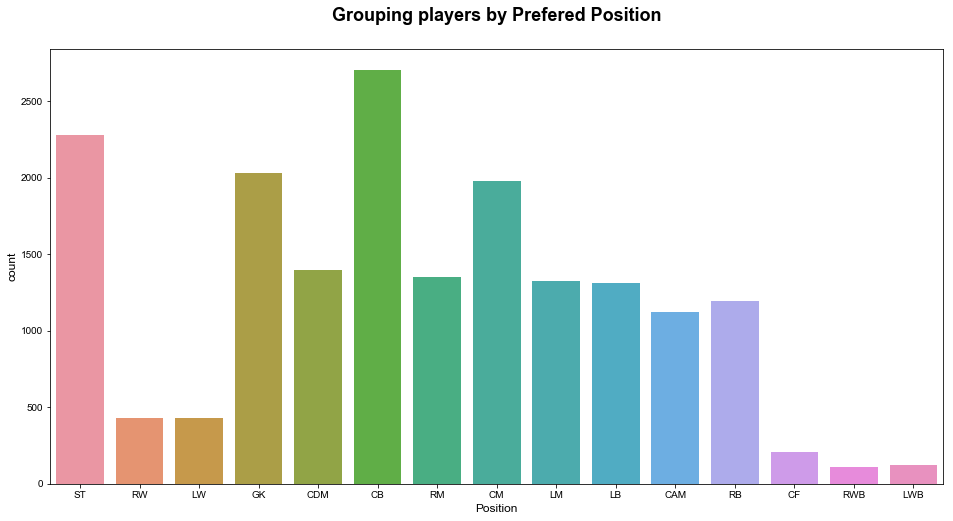

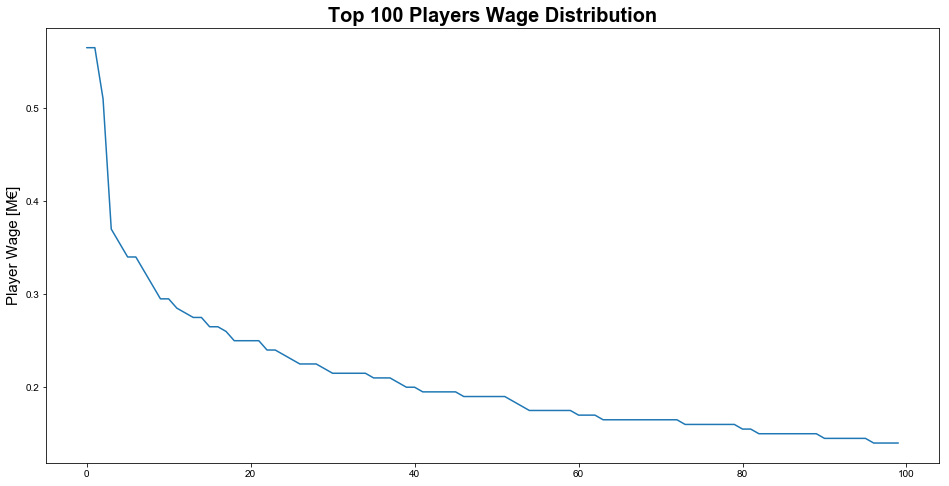

<Figure size 432x288 with 0 Axes>

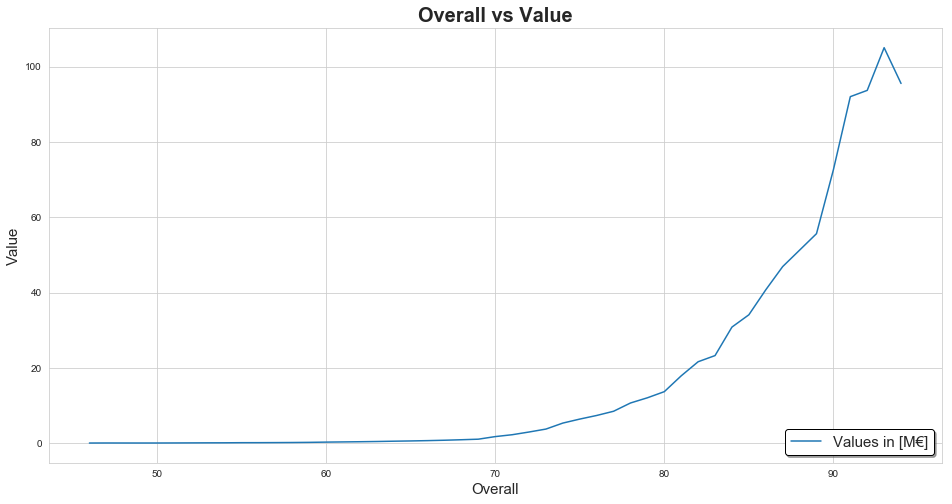

In [4]:
# groups of player by there position
plt.figure(figsize=(16,8))
plt.title('Grouping players by Prefered Position', fontsize=18, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=12)
plt.ylabel('Players Age', fontsize=12)
sns.countplot(x="Position", data= df)

# Wage distribution of top 100 players
value_distribution_values = df.sort_values("Wage (M)", ascending=False).reset_index().head(100)[["Name", "Wage (M)"]]
plt.figure(figsize=(16,8))
plt.title('Top 100 Players Wage Distribution', fontsize=20, fontweight='bold')
plt.ylabel('Player Wage [M€]', fontsize=15)
sns.set_style("whitegrid")
plt.plot(value_distribution_values['Wage (M)'])
    
# Comparision graph of Overall vs values(M)
overall = df.sort_values('Overall')['Overall'].unique()    
overall_value = df.groupby(['Overall'])['Value (M)'].mean()
    
plt.figure()
plt.figure(figsize=(16,8))
plt.title('Overall vs Value', fontsize=20, fontweight='bold')
plt.xlabel('Overall', fontsize=15)
plt.ylabel('Value', fontsize=15)
sns.set_style("whitegrid")
plt.plot(overall, overall_value, label="Values in [M€]")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")

# Finding the Best Squad
You have analysed the market and decided that the market is fair with respect to players and their worth. Your club has asked you to buy best players of their respective playing position. Based on your tactical football mind, you have two gameplay position list, 
1. 4-3-3 https://7500toholte.sbnation.com/2015/5/8/8566029/football-tactics-basics-the-4-3-3-formation-explained 
2. 3-5-2 https://7500toholte.sbnation.com/2015/7/14/8933799/football-tactics-basics-the-3-5-2-formation-explained

In [5]:
p_list_1= ['GK', 'LB', 'CB', 'CB', 'RB', 'LM', 'CDM', 'RM', 'LW', 'ST', 'RW']

p_list_2 = ['GK', 'LWB', 'CB', 'RWB', 'LM', 'CDM', 'CAM', 'CM', 'RM', 'LW', 'RW']

    
# p_list_1 stats
df_copy = df.copy()
store = []
for i in p_list_1:
    store.append([i,df_copy.loc[[df_copy[df_copy['Position'] == i]['Overall'].idxmax()]]['Name'].to_string(index=False), df_copy[df_copy['Position'] == i]['Overall'].max()])
df_copy.drop(df_copy[df_copy['Position'] == i]['Overall'].idxmax(), inplace=True)
# return store
df1= pd.DataFrame(np.array(store).reshape(11, 3), columns=['Position', 'Player', 'Overall'])

# p_list_2 stats
df_copy = df.copy()
store = []
for i in p_list_2:
    store.append([i,df_copy.loc[[df_copy[df_copy['Position'] == i]['Overall'].idxmax()]]['Name'].to_string(index=False), df_copy[df_copy['Position'] == i]['Overall'].max()])
df_copy.drop(df_copy[df_copy['Position'] == i]['Overall'].idxmax(), inplace=True)

# return store
df2= pd.DataFrame(np.array(store).reshape(11, 3), columns=['Position', 'Player', 'Overall'])

if df1['Overall'].mean() > df2['Overall'].mean():
        print(df1)
        print(p_list_1)
else:
    print(df2)
    print(p_list_2)
        
    
    
    

   Position              Player Overall
0        GK            M. Neuer      92
1        LB             Marcelo      87
2        CB        Sergio Ramos      90
3        CB        Sergio Ramos      90
4        RB            Carvajal      84
5        LM          C. Eriksen      87
6       CDM            T. Kroos      90
7        RM        K. De Bruyne      89
8        LW              Neymar      92
9        ST   Cristiano Ronaldo      94
10       RW            L. Messi      93
['GK', 'LB', 'CB', 'CB', 'RB', 'LM', 'CDM', 'RM', 'LW', 'ST', 'RW']


# Player Transfer
With your invincible team, you have won the club cup. It's time for the summer market transfer. The club owner has asked you to buy a future prospect named 'Alex Rodriguez'.

You are confused as to what value you should buy the player for. Thankfully your data science skills will help

In [6]:
# independent variables
X = df[['Overall','Potential','Wage (M)']]

# dependent variables
y = df['Value (M)'].copy()

# Split the dataset    
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

# Instantiate linear regression
model = LinearRegression()

# fit the model on training data
model.fit(X_train,y_train)


# make prediction
y_pred = model.predict(X_test)

# calculate the mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ",mae)

# calculate the r2 score
r2 = r2_score(y_test, y_pred)
print("R2 score: ",r2)    

Mean Absolute Error:  1.394595127663726
R2 score:  0.746327813472971


# Introducing Polynomial function to linear regression
There are numerous ways to improve a model. One being implementation of Polynomial Function.

In [7]:
# Instantiate third degree polynomial features
poly = PolynomialFeatures(degree=3)
   
# fit and transform polynomial features on X_train    
X_train_2 = poly.fit_transform(X_train)

# instantiate Linear regression model
model=LinearRegression()

# fit the model 
model.fit(X_train_2,y_train)
    
# transform on x_test    
X_test_2 = poly.transform(X_test)

# predict the model performance
y_pred_2=model.predict(X_test_2)
    
# Calculate the mean absolute error    
mae= mean_absolute_error(y_test, y_pred_2)
print("Mean Absolute Error",mae)

# calculate the r2 score
r2= r2_score(y_test, y_pred_2)
print("R2 score: ",r2)

Mean Absolute Error 0.5326507223889104
R2 score:  0.9307805489704964
